In [1]:
using AvailablePotentialEnergyFramework, Statistics, JLD

In [2]:
using PyPlot, PyCall
tkr = pyimport("matplotlib.ticker")# import FormatStrFormatter
#from matplotlib.colors import DivergingNorm
c = pyimport("matplotlib.colors")

PyObject <module 'matplotlib.colors' from '/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/matplotlib/colors.py'>

In [3]:
PyPlot.matplotlib.__version__

"3.1.1"

In [4]:
data_dir = "/global/cscratch1/sd/aramreye/for_postprocessing/CompositeOutputs_50d_9hpa_checkingInteraction/"
output_dir = "/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"

"/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"

In [5]:
file_list_nomask = ["f5e-4_2km_1000km_control_nomask.jld"
"f5e-4_2km_1000km_homoRad_homoSfc_nomask.jld"
"f5e-4_2km_1000km_homoRad_nomask.jld"
"f5e-4_2km_1000km_homoSfc_nomask.jld"]
file_list_withmask = ["f5e-4_2km_1000km_control_withmask.jld"
"f5e-4_2km_1000km_homoRad_homoSfc_withmask.jld"
"f5e-4_2km_1000km_homoRad_withmask.jld"
"f5e-4_2km_1000km_homoSfc_withmask.jld"]

4-element Array{String,1}:
 "f5e-4_2km_1000km_control_withmask.jld"
 "f5e-4_2km_1000km_homoRad_homoSfc_withmask.jld"
 "f5e-4_2km_1000km_homoRad_withmask.jld"
 "f5e-4_2km_1000km_homoSfc_withmask.jld"

In [6]:
control_withmask_composite =  load(string(data_dir,"f5e-4_2km_1000km_control_withmask.jld"))
control_nomask_composite =  load(string(data_dir,"f5e-4_2km_1000km_control_nomask.jld"))
homoSfc_withmask_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoSfc_withmask.jld"))
homoSfc_nomask_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoSfc_nomask.jld"))
homoRad_withmask_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoRad_withmask.jld"))
homoRad_nomask_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoRad_nomask.jld"))
homoAll_withmask_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_withmask.jld"))
homoAll_nomask_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_nomask.jld"))

Dict{String,Any} with 17 entries:
  "W"                      => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ;…
  "LHF"                    => Float32[116.426 116.426 … 116.426 116.426; 116.42…
  "V"                      => Float32[0.262151 0.330834 … 0.222891 0.246164; 0.…
  "QRAD"                   => Float32[-1.54948 -1.54948 … -1.54948 -1.54948; -1…
  "PW"                     => Float32[45.073 45.0976 … 45.0895 45.0738; 45.107 …
  "USFC"                   => Float32[-0.6047 -0.604707 … -0.586771 -0.566934; …
  "PSFC"                   => Float32[1001.09 1001.09 … 1001.07 1001.08; 1001.1…
  "PP"                     => Float32[-149.554 -148.72 … -151.356 -150.449; -14…
  "QV"                     => Float32[17.2424 17.2662 … 17.2379 17.2461; 17.249…
  "Prec"                   => Float32[4.83068 4.96832 … 4.20037 4.16078; 4.5020…
  "convec_heating_anomaly" => Float32[-2.26617f-7 4.45233f-7 … -3.67672f-7 8.84…
  "VSFC"                   => Float32[0.262297 0.331158 … 0.222852 0.246337

In [7]:
radiusbins = 1000:2000:512000;
length(radiusbins)

256

In [8]:
function get_tangential_and_radial_speed(composite)
    tangential = similar(composite["V"])
    radial = similar(composite["V"]);
    for index in CartesianIndices(tangential)
        center = (256,256)
        index_of_point = (index[1],index[2])
        tangential[index],radial[index] = AvailablePotentialEnergyFramework.velocity_cartesian_to_polar(composite["U"][index],composite["V"][index],index_of_point,center)
    end
    return tangential,radial
end

function get_azimuthal_average(array :: Array{T,3},radiusbins) where T
    azimuthalaverage = zeros(eltype(array),length(radiusbins) - 1,size(array,3));
    for rindex in 1:(length(radiusbins) - 1)
        azimuthalaverage[rindex,:] .= AvailablePotentialEnergyFramework.averageallindistance((radiusbins[rindex],radiusbins[rindex+1]),array,(256,256),2000.0)   
    end
    return azimuthalaverage
end

function get_azimuthal_average(array :: Array{T,2},radiusbins) where T
    azimuthalaverage = zeros(eltype(array),length(radiusbins) - 1);
    for rindex in 1:(length(radiusbins) - 1)
        azimuthalaverage[rindex] = AvailablePotentialEnergyFramework.averageallindistance((radiusbins[rindex],radiusbins[rindex+1]),array,(256,256),2000.0)   
    end
    return azimuthalaverage
end

get_azimuthal_average (generic function with 2 methods)

In [ ]:
dia_heating_control_nomask = 86400.0/g*get_azimuthal_average(control_nomask_composite["convec_heating_anomaly"].*mean(control_nomask_composite["TABS"],dims=(1,2)),radiusbins)
dia_heating_homoRad_nomask = 86400.0/g*get_azimuthal_average(homoRad_nomask_composite["convec_heating_anomaly"].*mean(homoRad_nomask_composite["TABS"],dims=(1,2)),radiusbins)
dia_heating_homoSfc_nomask = 86400.0/g*get_azimuthal_average(homoSfc_nomask_composite["convec_heating_anomaly"].*mean(homoSfc_nomask_composite["TABS"],dims=(1,2)),radiusbins)
dia_heating_homoAll_nomask = 86400.0/g*get_azimuthal_average(homoAll_nomask_composite["convec_heating_anomaly"].*mean(homoAll_nomask_composite["TABS"],dims=(1,2)),radiusbins)

tpert_control_nomask = get_azimuthal_average(control_nomask_composite["TABS"] .- mean(control_nomask_composite["TABS"],dims=(1,2)),radiusbins)
tpert_homoRad_nomask = get_azimuthal_average(homoRad_nomask_composite["TABS"] .- mean(homoRad_nomask_composite["TABS"],dims=(1,2)),radiusbins)
tpert_homoSfc_nomask = get_azimuthal_average(homoSfc_nomask_composite["TABS"] .- mean(homoSfc_nomask_composite["TABS"],dims=(1,2)),radiusbins)
tpert_homoAll_nomask = get_azimuthal_average(homoAll_nomask_composite["TABS"] .- mean(homoAll_nomask_composite["TABS"],dims=(1,2)),radiusbins)

surfu_control_nomask = hypot.(control_nomask_composite["USFC"],control_nomask_composite["VSFC"])
surfu_homoRad_nomask = hypot.(homoRad_nomask_composite["USFC"],homoRad_nomask_composite["VSFC"])
surfu_homoSfc_nomask = hypot.(homoSfc_nomask_composite["USFC"],homoSfc_nomask_composite["VSFC"])
surfu_homoAll_nomask = hypot.(homoAll_nomask_composite["USFC"],homoAll_nomask_composite["VSFC"])

averagespeed_control_nomask = get_azimuthal_average(surfu_control_nomask,radiusbins)
averagespeed_homoRad_nomask = get_azimuthal_average(surfu_homoRad_nomask,radiusbins)
averagespeed_homoSfc_nomask = get_azimuthal_average(surfu_homoSfc_nomask,radiusbins)
averagespeed_homoAll_nomask = get_azimuthal_average(surfu_homoAll_nomask,radiusbins)

surfpres_control_nomask = control_nomask_composite["PSFC"]
surfpres_homoRad_nomask = homoRad_nomask_composite["PSFC"]
surfpres_homoSfc_nomask = homoSfc_nomask_composite["PSFC"]
surfpres_homoAll_nomask = homoAll_nomask_composite["PSFC"]


averagepres_control_nomask = get_azimuthal_average(surfpres_control_nomask,radiusbins)
averagepres_homoRad_nomask = get_azimuthal_average(surfpres_homoRad_nomask,radiusbins)
averagepres_homoSfc_nomask = get_azimuthal_average(surfpres_homoSfc_nomask,radiusbins)
averagepres_homoAll_nomask = get_azimuthal_average(surfpres_homoAll_nomask,radiusbins)




tangential_control_nomask, radial_control_nomask = get_azimuthal_average(get_tangential_and_radial_speed(control_nomask_composite)[1],radiusbins),get_azimuthal_average(get_tangential_and_radial_speed(control_nomask_composite)[2],radiusbins)
tangential_homoRad_nomask, radial_homoRad_nomask = get_azimuthal_average(get_tangential_and_radial_speed(homoRad_nomask_composite)[1],radiusbins),get_azimuthal_average(get_tangential_and_radial_speed(homoRad_nomask_composite)[2],radiusbins)
tangential_homoSfc_nomask, radial_homoSfc_nomask = get_azimuthal_average(get_tangential_and_radial_speed(homoSfc_nomask_composite)[1],radiusbins),get_azimuthal_average(get_tangential_and_radial_speed(homoSfc_nomask_composite)[2],radiusbins)
tangential_homoAll_nomask, radial_homoAll_nomask = get_azimuthal_average(get_tangential_and_radial_speed(homoAll_nomask_composite)[1],radiusbins),get_azimuthal_average(get_tangential_and_radial_speed(homoAll_nomask_composite)[2],radiusbins);


In [ ]:
z_grd = [50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1178.57142857143 1385.71428571429 1671.42857142857 2035.71428571429 2478.57142857143 3000 3600 4200 4800 5400 6000 6600 7200 7800 8400 9000 9600 10200 10800 11400 12000 12600 13200 13800 14400 15000 15600 16200 16800 17400 18000 18600 19200 19800 20400 21000 21600 22200 22800 23400 24000 24600 25200 25800 26400 27000 27600 28200 28800 29400 30000 30600 31200 31800 32400 33000 33600 34200 34800];
x = 1e-3collect(range(0,step=2000,length=255))
y = x
z_iter = 1:56; #3:56
x_iter = 1:100 #2:100

In [11]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=14)

In [ ]:
PyPlot.matplotlib.

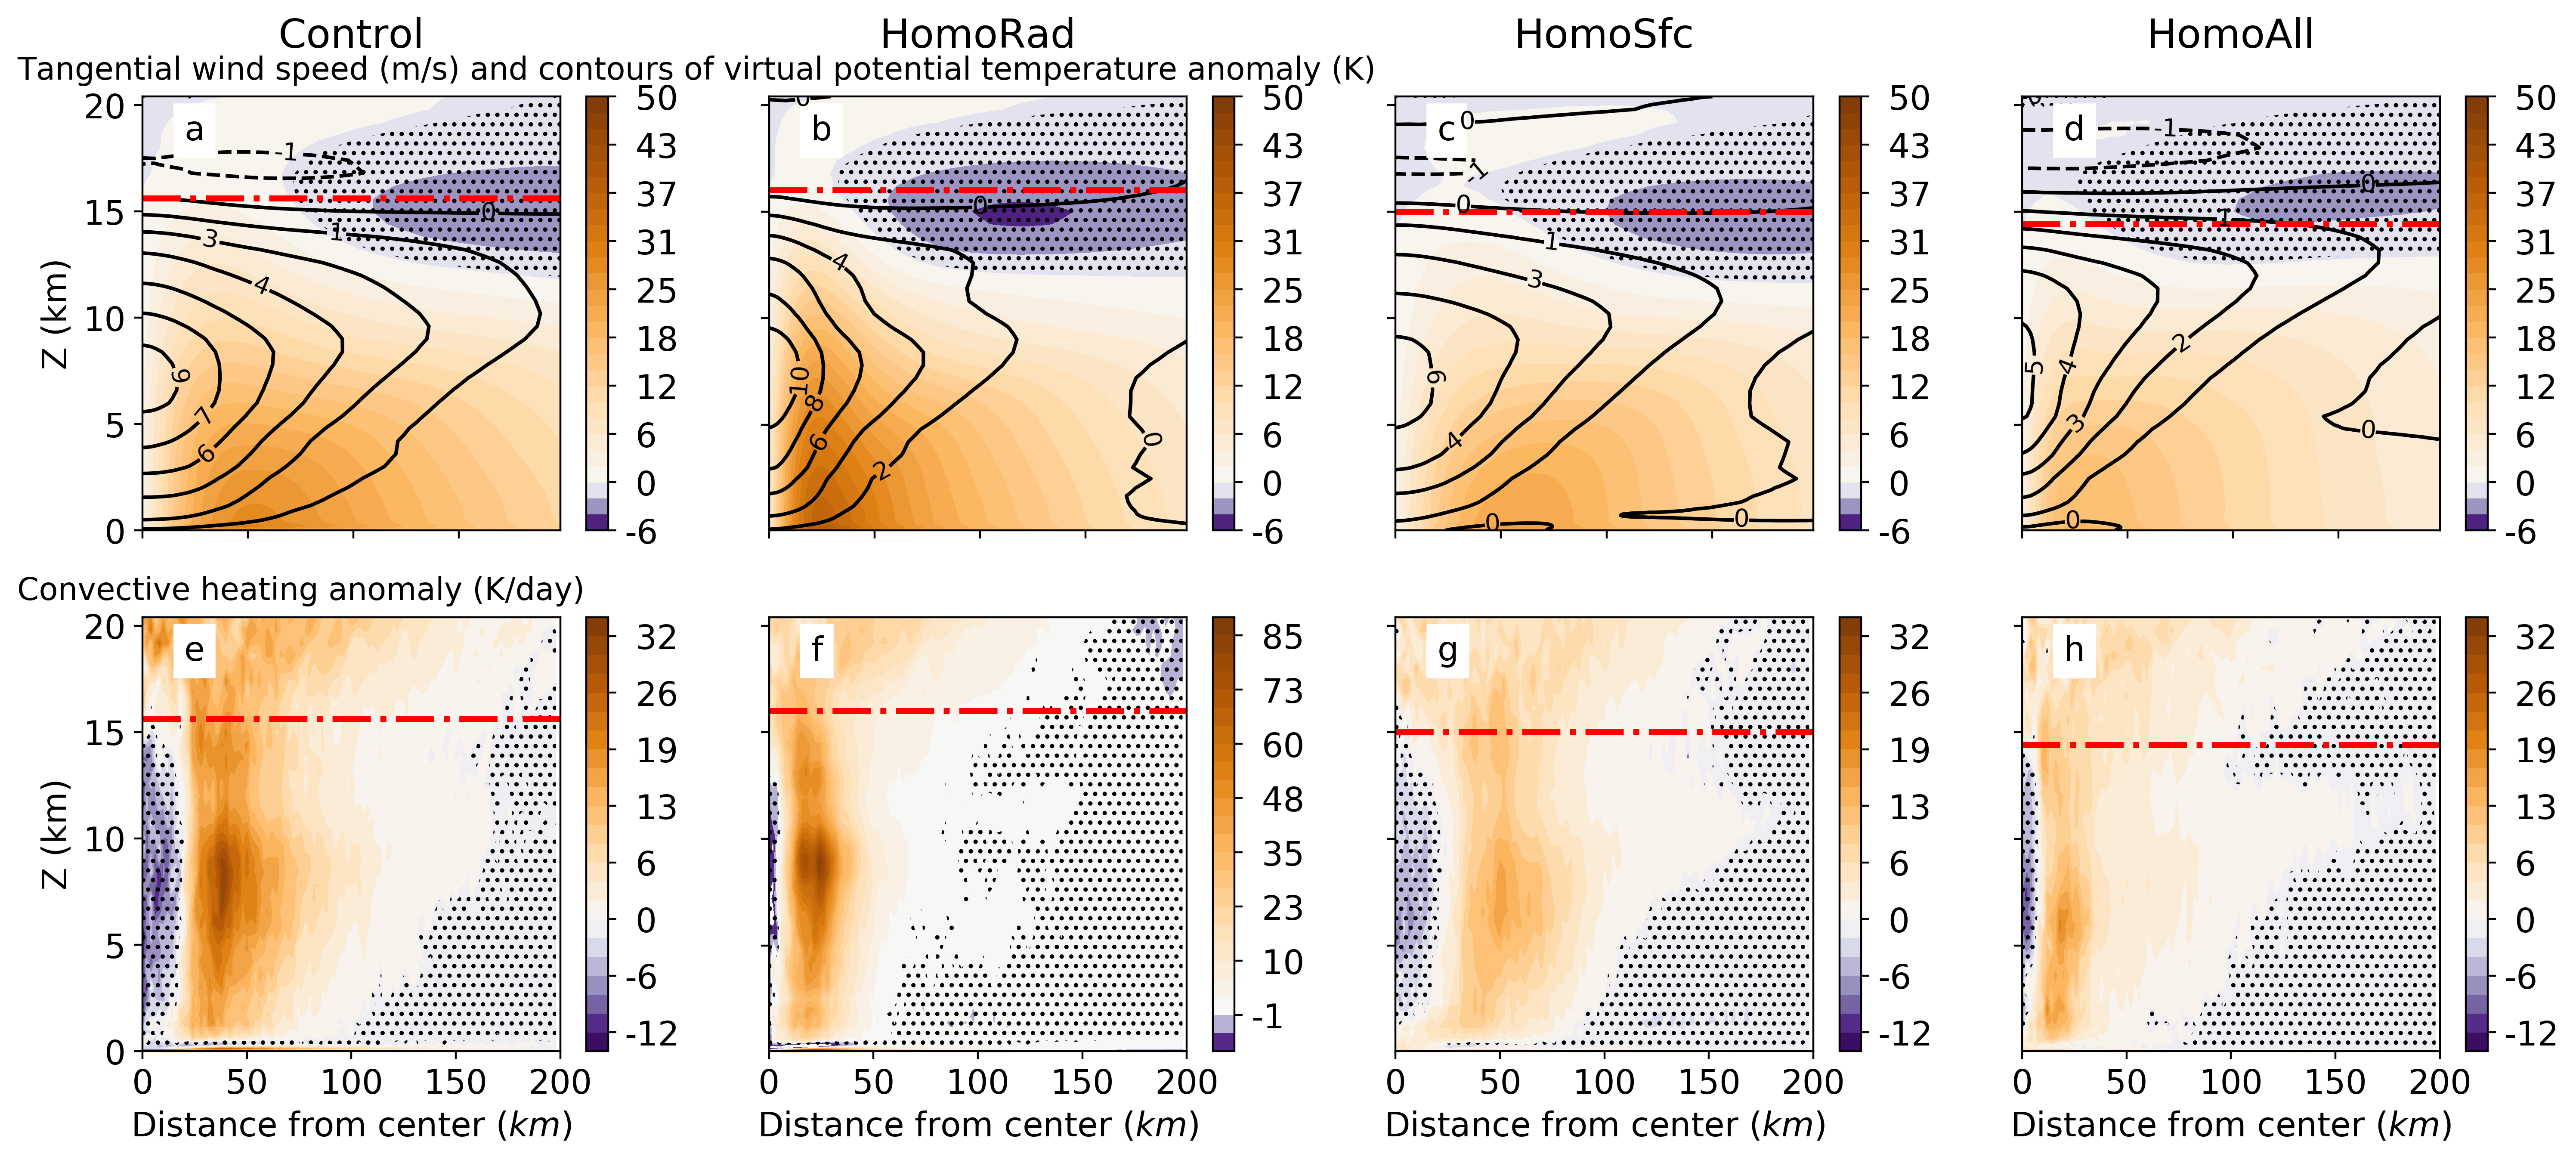

In [46]:
#cmap = "PiYG"
cmap_convec = "PuOr_r"
cmap = "PuOr_r"
#cmap_convec = "RdBu_r"
#cmap_convec="coolwarm"
#cmap = "RdBu_r"
labelfontsize = 8
clabfmt = "%d"
ccolor = "k"

levels_tpert = range(-maximum(abs,tpert_control_nomask[x_iter,z_iter]),length=15,stop=maximum(abs,tpert_control_nomask[x_iter,z_iter]))#[[1:5;8:15]]
levels_tangential = range(-6,stop=50,length=28)
levels_dia_shared = range(-15,stop=35,length=24)
levels_dia_homoRad = range(-10,stop=90,length=25)
fig, ax = plt.subplots(2,4,figsize=(1.5*12,1.5*4.8),sharex=true,sharey=true, dpi=400)
p2 = ax[2,1].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_control_nomask[x_iter,z_iter]),cmap=cmap_convec,norm=c.DivergingNorm(0),levels=levels_dia_shared)
cs = ax[2,1].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_control_nomask[x_iter,z_iter]), [-100,0.0,100], colors="none",hatches=["...", nothing,nothing])
p3 = ax[1,1].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_control_nomask[x_iter,z_iter]),levels=levels_tangential,cmap=cmap,norm=c.DivergingNorm(0))
cs = ax[1,1].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_control_nomask[x_iter,z_iter]), [-100,0.0,100], colors="none",hatches=["...", nothing,nothing])
p31 = ax[1,1].contour(x[x_iter],1e-3*z_grd[z_iter],permutedims(tpert_control_nomask[x_iter,z_iter]),colors=ccolor,linewidth=1)
ax[1,1].axhline(y=15.6, color="r", linestyle="-.", lw=2.5)
ax[2,1].axhline(y=15.6, color="r", linestyle="-.", lw=2.5)
cb2 = fig.colorbar(p2, ax = ax[2,1],format=tkr.FormatStrFormatter("% d"))
cb3 = fig.colorbar(p3, ax = ax[1,1],format=tkr.FormatStrFormatter("% d"))
contlab3 = ax[1,1].clabel(p31, inline=1, fontsize=1.3labelfontsize,fmt=clabfmt)

###################################
p5 = ax[2,2].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_homoRad_nomask[x_iter,z_iter]),cmap=cmap_convec,norm=c.DivergingNorm(0),levels=levels_dia_homoRad)
cs = ax[2,2].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_homoRad_nomask[x_iter,z_iter]), [-100,0.0,100], colors="none",hatches=["...", nothing,nothing])
p6 = ax[1,2].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_homoRad_nomask[x_iter,z_iter]),cmap=cmap,levels_tangential,norm=c.DivergingNorm(0))
cs = ax[1,2].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_homoRad_nomask[x_iter,z_iter]), [-100,0.0,100], colors="none",hatches=["...", nothing,nothing])
p61 = ax[1,2].contour(x[x_iter],1e-3*z_grd[z_iter],permutedims(tpert_homoRad_nomask[x_iter,z_iter]),colors=ccolor,linewidth=1)
contlab6 = ax[1,2].clabel(p61, inline=1, fontsize=1.3labelfontsize,fmt=clabfmt)
ax[1,2].axhline(y=16, color="r", linestyle="-.", lw=2.5)
ax[2,2].axhline(y=16, color="r", linestyle="-.", lw=2.5)
cb5 = fig.colorbar(p5, ax = ax[2,2],format=tkr.FormatStrFormatter("% d"),extend="both")
cb6 = fig.colorbar(p6, ax = ax[1,2],format=tkr.FormatStrFormatter("% d"))
###################################

p7 = ax[2,3].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_homoSfc_nomask[x_iter,z_iter]),cmap=cmap_convec,norm=c.DivergingNorm(0),levels=levels_dia_shared)
cs = ax[2,3].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_homoSfc_nomask[x_iter,z_iter]), [-100,0.0,100], colors="none",hatches=["...", nothing,nothing])
p8 = ax[1,3].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_homoSfc_nomask[x_iter,z_iter]),cmap=cmap,levels_tangential,norm=c.DivergingNorm(0))
cs = ax[1,3].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_homoSfc_nomask[x_iter,z_iter]), [-100,0.0,100], colors="none",hatches=["...", nothing,nothing])
p81 = ax[1,3].contour(x[x_iter],1e-3*z_grd[z_iter],permutedims(tpert_homoSfc_nomask[x_iter,z_iter]),colors=ccolor,linewidth=1)
contlab6 = ax[1,3].clabel(p81, inline=1, fontsize=1.3labelfontsize,fmt=clabfmt)
ax[1,3].axhline(y=15.0, color="r", linestyle="-.", lw=2.5)
ax[2,3].axhline(y=15.0, color="r", linestyle="-.", lw=2.5)
cb7 = fig.colorbar(p7, ax = ax[2,3],format=tkr.FormatStrFormatter("% d"))
cb8 = fig.colorbar(p8, ax = ax[1,3],format=tkr.FormatStrFormatter("% d"))
####################################

p9 = ax[2,4].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_homoAll_nomask[x_iter,z_iter]),cmap=cmap_convec,norm=c.DivergingNorm(0),levels=levels_dia_shared)
cs = ax[2,4].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_homoAll_nomask[x_iter,z_iter]), [-100,0.0,100], colors="none",hatches=["...", nothing,nothing])
p10 = ax[1,4].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_homoAll_nomask[x_iter,z_iter]),cmap=cmap,levels_tangential,norm=c.DivergingNorm(0))
cs = ax[1,4].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_homoAll_nomask[x_iter,z_iter]), [-100,0.0,100], colors="none",hatches=["...", nothing,nothing])
p101 = ax[1,4].contour(x[x_iter],1e-3*z_grd[z_iter],permutedims(tpert_homoAll_nomask[x_iter,z_iter]),colors=ccolor,linewidth=1)
contlab7 = ax[1,4].clabel(p101, inline=1, fontsize=1.3labelfontsize,fmt=clabfmt)
ax[1,4].axhline(y=14.4, color="r", linestyle="-.", lw=2.5)
ax[2,4].axhline(y=14.4, color="r", linestyle="-.", lw=2.5)
cb9 = fig.colorbar(p9, ax = ax[2,4],format=tkr.FormatStrFormatter("% d"))
cb10 = fig.colorbar(p10, ax = ax[1,4],format=tkr.FormatStrFormatter("% d"))

ax[2,1].text(-0.3, 1.04, string("Convective heating anomaly (K/day)"), transform=ax[2,1].transAxes, size=13)
ax[1,1].text(-0.3, 1.04, string("Tangential wind speed (m/s) and contours of virtual potential temperature anomaly (K)"), transform=ax[1,1].transAxes, size=13)

ax[1,1].annotate("a", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[1,2].annotate("b", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[1,3].annotate("c", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[1,4].annotate("d", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2,1].annotate("e", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2,2].annotate("f", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2,3].annotate("g", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2,4].annotate("h", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")

[ax[j,1].set_yticks([0, 5, 10, 15, 20]) for j in 1:2]
[ax[2,j].set_xticks([0, 50, 100, 150, 200]) for j in 1:4]
ax[1,1].set_ylabel("Z (km)")
ax[2,1].set_ylabel("Z (km)")
#ax[3,1].set_ylabel("Z (km)")

ax[2,1].set_xlabel(string("Distance from center ", L"(km)"))
ax[2,2].set_xlabel(string("Distance from center ", L"(km)"))
ax[2,3].set_xlabel(string("Distance from center ", L"(km)"))
ax[2,4].set_xlabel(string("Distance from center ", L"(km)"))
ax[1,1].set_title("Control",y=1.08)
ax[1,2].set_title("HomoRad",y=1.08)
ax[1,3].set_title("HomoSfc",y=1.08)
ax[1,4].set_title("HomoAll",y=1.08)
#fig.suptitle("Treshold $treshold hPa")
plt.tight_layout
savefig(joinpath(output_dir,"composite_2d_azimuthal_withhatches.png"), bbox_inches="tight")
savefig(joinpath(output_dir,"composite_2d_azimuthal_withhatches.eps"), bbox_inches="tight")
savefig(joinpath(output_dir,"composite_2d_azimuthal_withhatches.pdf"), bbox_inches="tight")

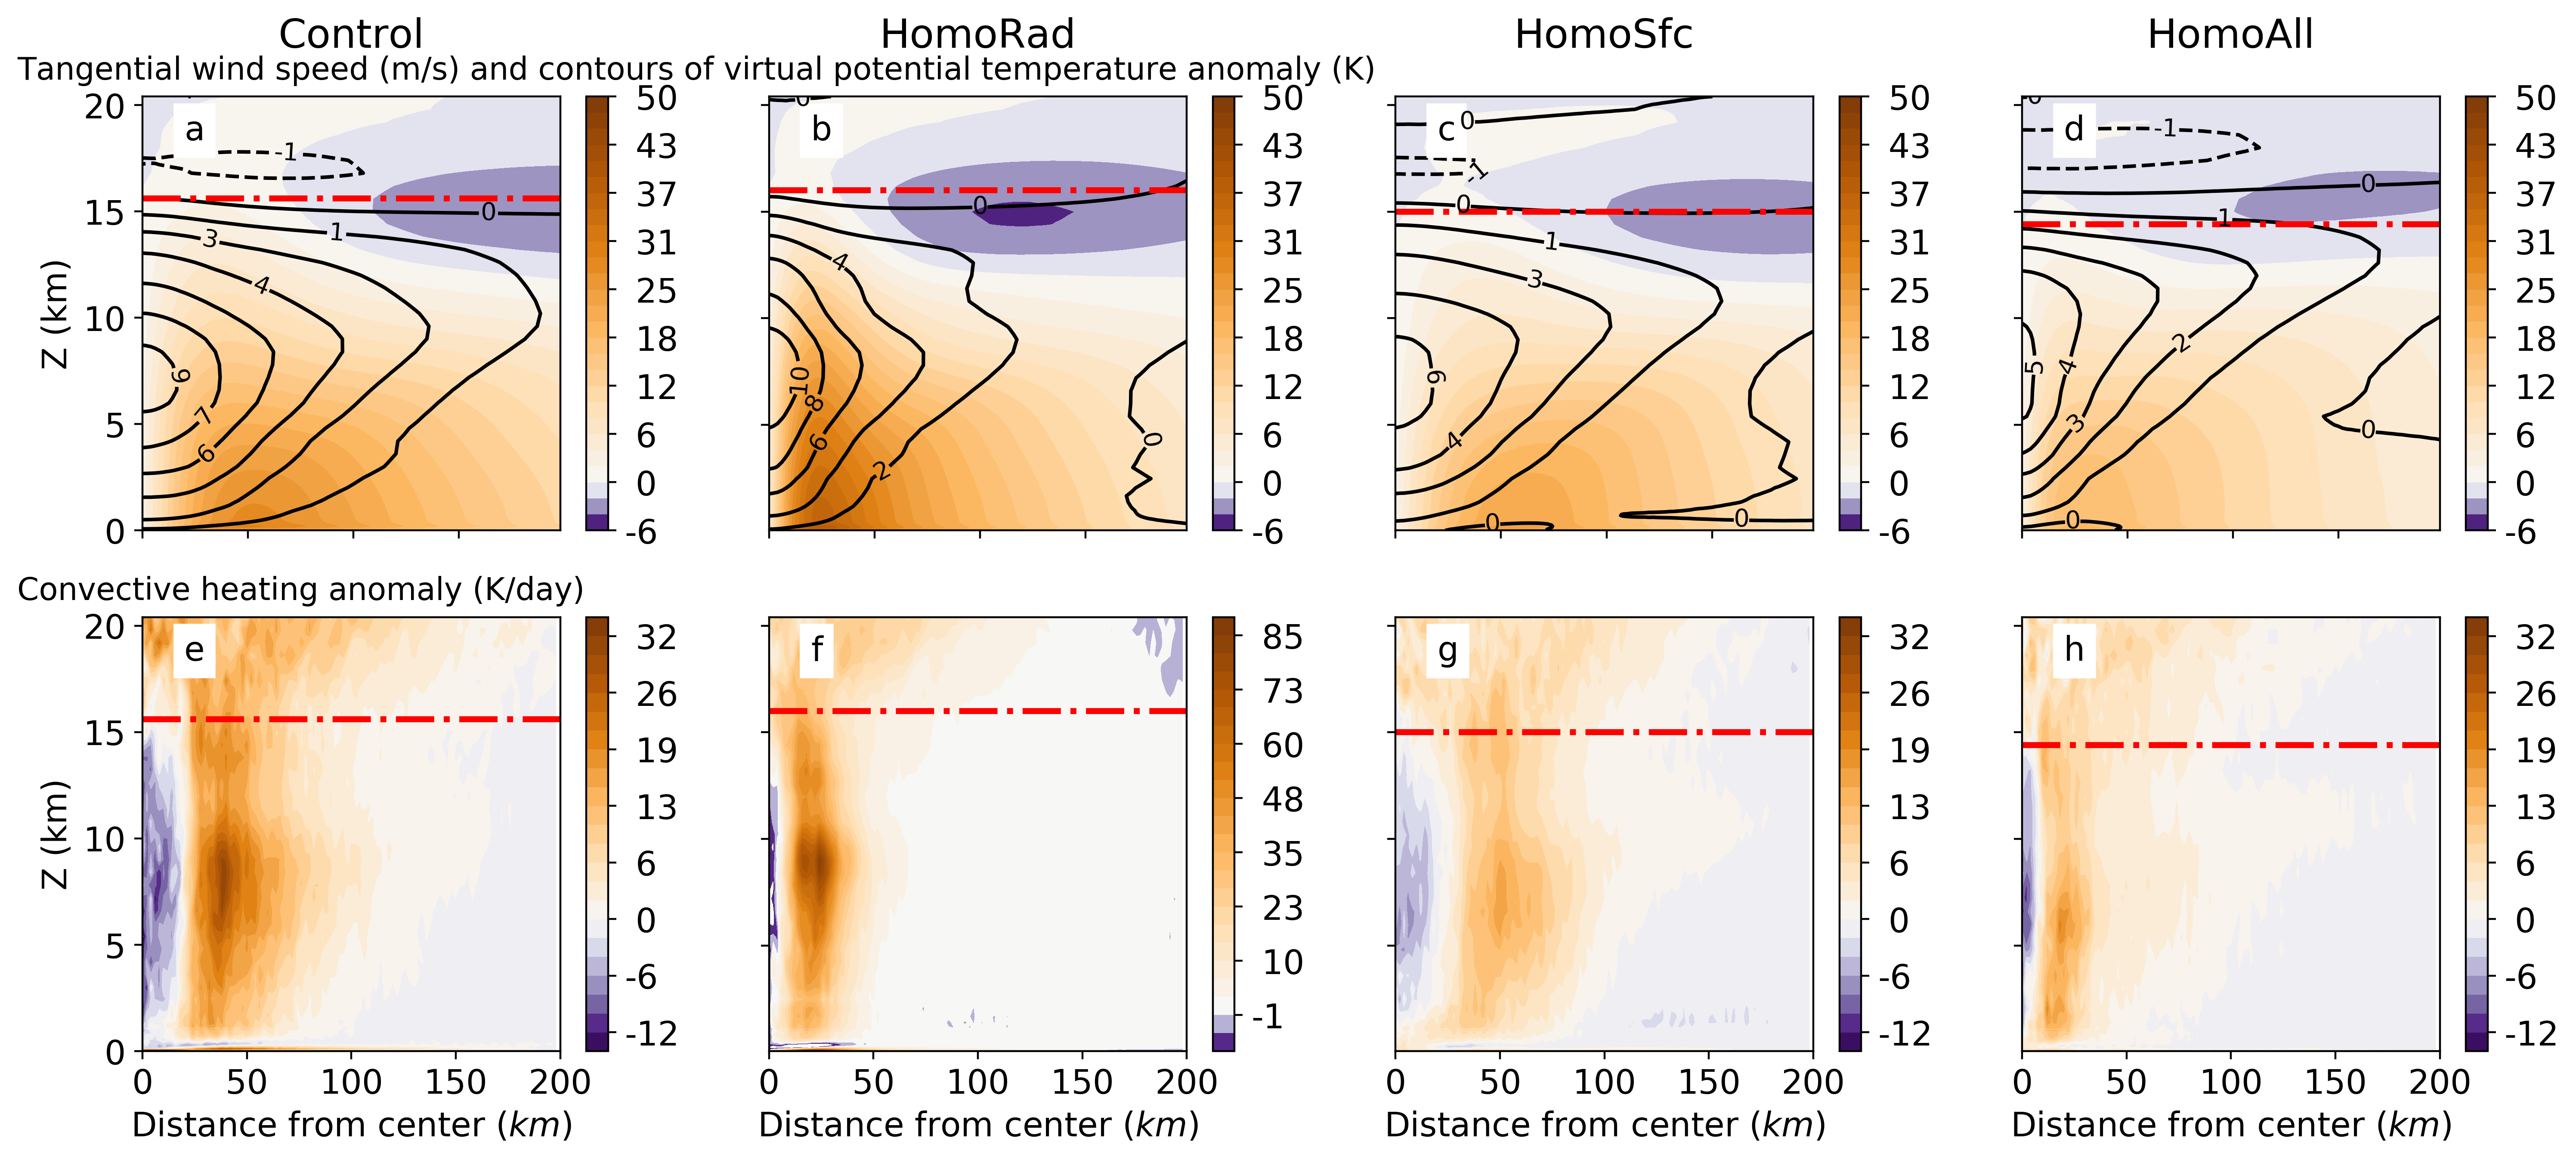

In [47]:
#cmap = "PiYG"
cmap_convec = "PuOr_r"
cmap = "PuOr_r"
#cmap_convec = "RdBu_r"
#cmap_convec="coolwarm"
#cmap = "RdBu_r"
labelfontsize = 8
clabfmt = "%d"
ccolor = "k"

levels_tpert = range(-maximum(abs,tpert_control_nomask[x_iter,z_iter]),length=15,stop=maximum(abs,tpert_control_nomask[x_iter,z_iter]))#[[1:5;8:15]]
levels_tangential = range(-6,stop=50,length=28)
levels_dia_shared = range(-15,stop=35,length=24)
levels_dia_homoRad = range(-10,stop=90,length=25)
fig, ax = plt.subplots(2,4,figsize=(1.5*12,1.5*4.8),sharex=true,sharey=true, dpi=400)
p2 = ax[2,1].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_control_nomask[x_iter,z_iter]),cmap=cmap_convec,norm=c.DivergingNorm(0),levels=levels_dia_shared)
#cs = ax[2,1].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_control_nomask[x_iter,z_iter]), [-100,0.0,100], colors="none",hatches=["...", nothing,nothing])
p3 = ax[1,1].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_control_nomask[x_iter,z_iter]),levels=levels_tangential,cmap=cmap,norm=c.DivergingNorm(0))
#cs = ax[1,1].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_control_nomask[x_iter,z_iter]), [-100,0.0,100], colors="none",hatches=["...", nothing,nothing])
p31 = ax[1,1].contour(x[x_iter],1e-3*z_grd[z_iter],permutedims(tpert_control_nomask[x_iter,z_iter]),colors=ccolor,linewidth=1)
ax[1,1].axhline(y=15.6, color="r", linestyle="-.", lw=2.5)
ax[2,1].axhline(y=15.6, color="r", linestyle="-.", lw=2.5)
cb2 = fig.colorbar(p2, ax = ax[2,1],format=tkr.FormatStrFormatter("% d"))
cb3 = fig.colorbar(p3, ax = ax[1,1],format=tkr.FormatStrFormatter("% d"))
contlab3 = ax[1,1].clabel(p31, inline=1, fontsize=1.3labelfontsize,fmt=clabfmt)

###################################
p5 = ax[2,2].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_homoRad_nomask[x_iter,z_iter]),cmap=cmap_convec,norm=c.DivergingNorm(0),levels=levels_dia_homoRad)
#cs = ax[2,2].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_homoRad_nomask[x_iter,z_iter]), [-100,0.0,100], colors="none",hatches=["...", nothing,nothing])
p6 = ax[1,2].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_homoRad_nomask[x_iter,z_iter]),cmap=cmap,levels_tangential,norm=c.DivergingNorm(0))
#cs = ax[1,2].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_homoRad_nomask[x_iter,z_iter]), [-100,0.0,100], colors="none",hatches=["...", nothing,nothing])
p61 = ax[1,2].contour(x[x_iter],1e-3*z_grd[z_iter],permutedims(tpert_homoRad_nomask[x_iter,z_iter]),colors=ccolor,linewidth=1)
contlab6 = ax[1,2].clabel(p61, inline=1, fontsize=1.3labelfontsize,fmt=clabfmt)
ax[1,2].axhline(y=16, color="r", linestyle="-.", lw=2.5)
ax[2,2].axhline(y=16, color="r", linestyle="-.", lw=2.5)
cb5 = fig.colorbar(p5, ax = ax[2,2],format=tkr.FormatStrFormatter("% d"),extend="both")
cb6 = fig.colorbar(p6, ax = ax[1,2],format=tkr.FormatStrFormatter("% d"))
###################################

p7 = ax[2,3].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_homoSfc_nomask[x_iter,z_iter]),cmap=cmap_convec,norm=c.DivergingNorm(0),levels=levels_dia_shared)
#cs = ax[2,3].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_homoSfc_nomask[x_iter,z_iter]), [-100,0.0,100], colors="none",hatches=["...", nothing,nothing])
p8 = ax[1,3].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_homoSfc_nomask[x_iter,z_iter]),cmap=cmap,levels_tangential,norm=c.DivergingNorm(0))
#cs = ax[1,3].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_homoSfc_nomask[x_iter,z_iter]), [-100,0.0,100], colors="none",hatches=["...", nothing,nothing])
p81 = ax[1,3].contour(x[x_iter],1e-3*z_grd[z_iter],permutedims(tpert_homoSfc_nomask[x_iter,z_iter]),colors=ccolor,linewidth=1)
contlab6 = ax[1,3].clabel(p81, inline=1, fontsize=1.3labelfontsize,fmt=clabfmt)
ax[1,3].axhline(y=15.0, color="r", linestyle="-.", lw=2.5)
ax[2,3].axhline(y=15.0, color="r", linestyle="-.", lw=2.5)
cb7 = fig.colorbar(p7, ax = ax[2,3],format=tkr.FormatStrFormatter("% d"))
cb8 = fig.colorbar(p8, ax = ax[1,3],format=tkr.FormatStrFormatter("% d"))
####################################

p9 = ax[2,4].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_homoAll_nomask[x_iter,z_iter]),cmap=cmap_convec,norm=c.DivergingNorm(0),levels=levels_dia_shared)
#cs = ax[2,4].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_homoAll_nomask[x_iter,z_iter]), [-100,0.0,100], colors="none",hatches=["...", nothing,nothing])
p10 = ax[1,4].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_homoAll_nomask[x_iter,z_iter]),cmap=cmap,levels_tangential,norm=c.DivergingNorm(0))
#cs = ax[1,4].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_homoAll_nomask[x_iter,z_iter]), [-100,0.0,100], colors="none",hatches=["...", nothing,nothing])
p101 = ax[1,4].contour(x[x_iter],1e-3*z_grd[z_iter],permutedims(tpert_homoAll_nomask[x_iter,z_iter]),colors=ccolor,linewidth=1)
contlab7 = ax[1,4].clabel(p101, inline=1, fontsize=1.3labelfontsize,fmt=clabfmt)
ax[1,4].axhline(y=14.4, color="r", linestyle="-.", lw=2.5)
ax[2,4].axhline(y=14.4, color="r", linestyle="-.", lw=2.5)
cb9 = fig.colorbar(p9, ax = ax[2,4],format=tkr.FormatStrFormatter("% d"))
cb10 = fig.colorbar(p10, ax = ax[1,4],format=tkr.FormatStrFormatter("% d"))

ax[2,1].text(-0.3, 1.04, string("Convective heating anomaly (K/day)"), transform=ax[2,1].transAxes, size=13)
ax[1,1].text(-0.3, 1.04, string("Tangential wind speed (m/s) and contours of virtual potential temperature anomaly (K)"), transform=ax[1,1].transAxes, size=13)

ax[1,1].annotate("a", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[1,2].annotate("b", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[1,3].annotate("c", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[1,4].annotate("d", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2,1].annotate("e", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2,2].annotate("f", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2,3].annotate("g", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2,4].annotate("h", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")

[ax[j,1].set_yticks([0, 5, 10, 15, 20]) for j in 1:2]
[ax[2,j].set_xticks([0, 50, 100, 150, 200]) for j in 1:4]
ax[1,1].set_ylabel("Z (km)")
ax[2,1].set_ylabel("Z (km)")
#ax[3,1].set_ylabel("Z (km)")

ax[2,1].set_xlabel(string("Distance from center ", L"(km)"))
ax[2,2].set_xlabel(string("Distance from center ", L"(km)"))
ax[2,3].set_xlabel(string("Distance from center ", L"(km)"))
ax[2,4].set_xlabel(string("Distance from center ", L"(km)"))
ax[1,1].set_title("Control",y=1.08)
ax[1,2].set_title("HomoRad",y=1.08)
ax[1,3].set_title("HomoSfc",y=1.08)
ax[1,4].set_title("HomoAll",y=1.08)
#fig.suptitle("Treshold $treshold hPa")
plt.tight_layout
savefig(joinpath(output_dir,"composite_2d_azimuthal_withouthatches.png"), bbox_inches="tight")
savefig(joinpath(output_dir,"composite_2d_azimuthal_withouthatches.eps"), bbox_inches="tight")
savefig(joinpath(output_dir,"composite_2d_azimuthal_withouthatches.pdf"), bbox_inches="tight")